In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
ds_path = "C:/Users/Chavan/Desktop/Akhilesh_Deo/project/Plant Monitoring/Module one code/new/Dataset"

In [35]:
test_img_path = ds_path + "//394.jpg"
test_img_path

'C:/Users/Chavan/Desktop/Akhilesh_Deo/project/Plant Monitoring/Module one code/new/Dataset//394.jpg'

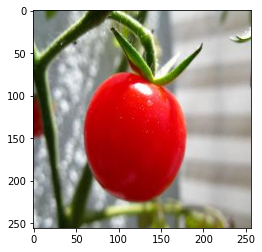

In [36]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

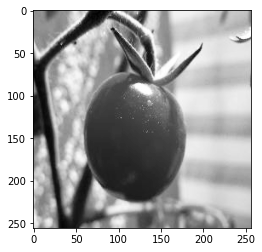

In [37]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [38]:
gs.shape

(256, 256)

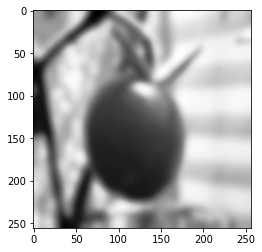

In [39]:
#Smoothing image using Guassian filter of size (25,25)
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

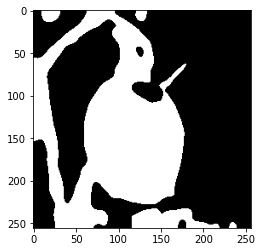

In [40]:
#Adaptive image thresholding using Otsu's thresholding method¶

ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

In [41]:
#Closing of holes using Morphological Transformation
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

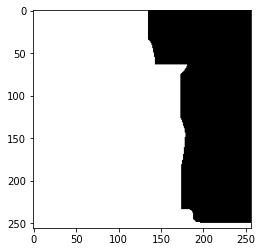

In [42]:
plt.imshow(closing,cmap='Greys_r')

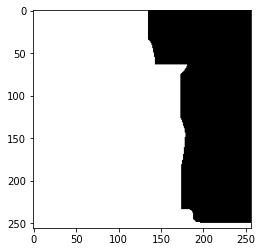

In [43]:
#Boundary extraction using contours - Effective
#Contours are used to extract leaf boundaries. They are continous, sharp and there are no gaps between the boundary pixels
plt.imshow(closing,cmap="Greys_r")

In [44]:
#contours,hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#image,contours=cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [45]:

len(contours)

1

In [46]:
cnt = contours[0]
len(cnt)

60

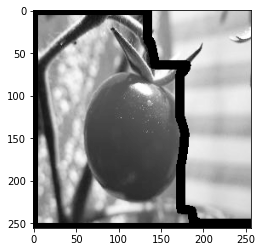

In [47]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

In [48]:
#Morphological processing
#1. Shape based features
#Calculating moments using contours

M = cv2.moments(cnt)
M


{'m00': 42587.5,
 'm10': 3612977.6666666665,
 'm01': 5735877.166666666,
 'm20': 415495540.0833333,
 'm11': 511726484.9583333,
 'm02': 996541826.25,
 'm30': 54731618001.600006,
 'm21': 61709695328.066666,
 'm12': 90923391552.86667,
 'm03': 193212181892.95,
 'mu20': 108982886.84395295,
 'mu11': 25114307.63141948,
 'mu02': 224007940.22503912,
 'mu30': 990929317.0607986,
 'mu21': 1487652559.929163,
 'mu12': -384821644.42988586,
 'mu03': -1347385252.1827698,
 'nu20': 0.06008886690158351,
 'nu11': 0.013847039037886541,
 'nu02': 0.12350914620525227,
 'nu30': 0.0026475081819875234,
 'nu21': 0.00397462488651498,
 'nu12': -0.0010281444243227557,
 'nu03': -0.0035998667291668577}

In [49]:
area = cv2.contourArea(cnt)
area

42587.5

In [50]:
perimeter = cv2.arcLength(cnt,True)
perimeter

1024.3259009122849

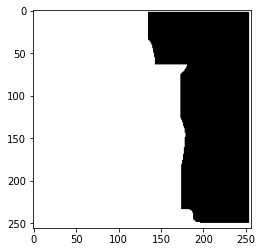

In [51]:
#Fitting in the best-fit rectangle and ellipse

#The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image.

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

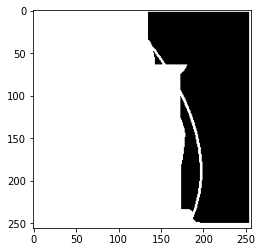

In [52]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

In [53]:
#Shape based features calculated - Aspect ratio, rectangularity, circularity etc.
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio




1.0

In [54]:
rectangularity = w*h/area
rectangularity

1.5388552979160552

In [55]:
circularity = ((perimeter)**2)/area
circularity

24.637359583909923

In [56]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

232.86066458594664

In [57]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

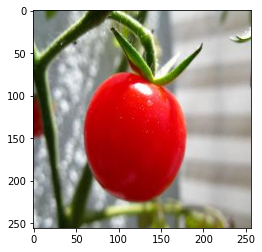

In [58]:
#2. Color based features
#Calculating color based features - mean, std-dev of the RGB channels

plt.imshow(img,cmap="Greys_r")

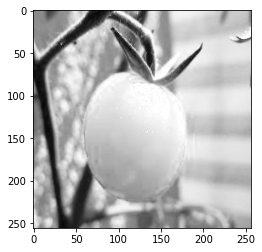

In [59]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

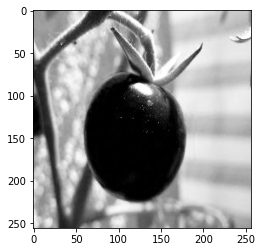

In [60]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

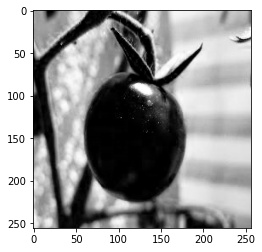

In [61]:


blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [62]:
np.mean(blue_channel)

112.16159057617188

In [63]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [64]:
red_mean = np.mean(red_channel)
red_mean

157.0419921875

In [65]:
green_mean = np.mean(green_channel)
green_mean

123.444580078125

In [66]:
blue_mean = np.mean(blue_channel)
blue_mean

111.90867614746094

In [67]:
red_var = np.std(red_channel)
red_var

55.531657829783526

In [68]:
#3. Texture based features
#Using Haralick moments - calculating texture based features such as contrast, correlation, entropy
import mahotas as mt

In [49]:
pip install mahotas

Note: you may need to restart the kernel to use updated packages.


In [69]:

import mahotas as mt

In [70]:

textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 1.11384534e-02,  4.09196859e+02,  9.59398521e-01,  5.04218328e+03,
        4.03151822e-01,  2.38266540e+02,  1.97595363e+04,  8.19337227e+00,
        1.12718360e+01,  5.16699655e-04,  3.86861903e+00, -4.49655108e-01,
        9.99184377e-01])

In [71]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

409.1968591256968
0.9593985213247586
0.40315182200309174
11.271836023508733


In [72]:

import numpy as np
import pandas as pd
import os
import string

In [73]:
dataset = pd.read_csv("plant.csv")

In [56]:
dataset

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,197787.0,3479.036035,1416,759,1.865613,5.433846,61.195588,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,0,101297.0,2491.210239,1191,130,9.161538,1.528476,61.266656,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,0,86626.5,2291.511754,1096,119,9.210084,1.505590,60.616856,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,0,190481.0,2858.479352,1319,254,5.192913,1.758842,42.896164,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,0,228035.0,2920.420478,1325,286,4.632867,1.661806,37.401521,8.992028,16.671173,6.294281,30.967158,45.040198,28.595326,8.641438,0.998568,0.898644,1.968082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,0,704713.5,4303.871605,1504,1081,1.391304,2.307071,26.284881,183.933673,214.830101,168.342977,93.378659,53.597153,112.379828,71.235238,0.993018,0.670357,5.632669
1903,0,726549.0,4391.511215,1519,1121,1.355040,2.343681,26.543799,28.967978,56.319042,19.137960,41.958245,72.526745,33.159139,44.850095,0.995506,0.670101,5.516079
1904,0,740823.5,4225.621823,1454,1056,1.376894,2.072591,24.102745,40.797882,66.247424,22.923872,54.374294,84.216772,35.419377,70.911464,0.990033,0.652729,5.773773
1905,0,727779.0,4457.687840,1542,1118,1.379249,2.368791,27.303592,24.642434,51.827690,14.627992,37.460028,67.302724,29.218939,65.832090,0.994308,0.663269,5.591044


In [51]:
pwd

'C:\\Users\\Chavan\\Desktop\\Akhilesh_Deo\\project\\Plant Monitoring\\Module one code'